# Importing the libraries

In [38]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
# Splitting the dataset
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

The fashion mnist dataset has 10 classes.
The classes are :  [0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


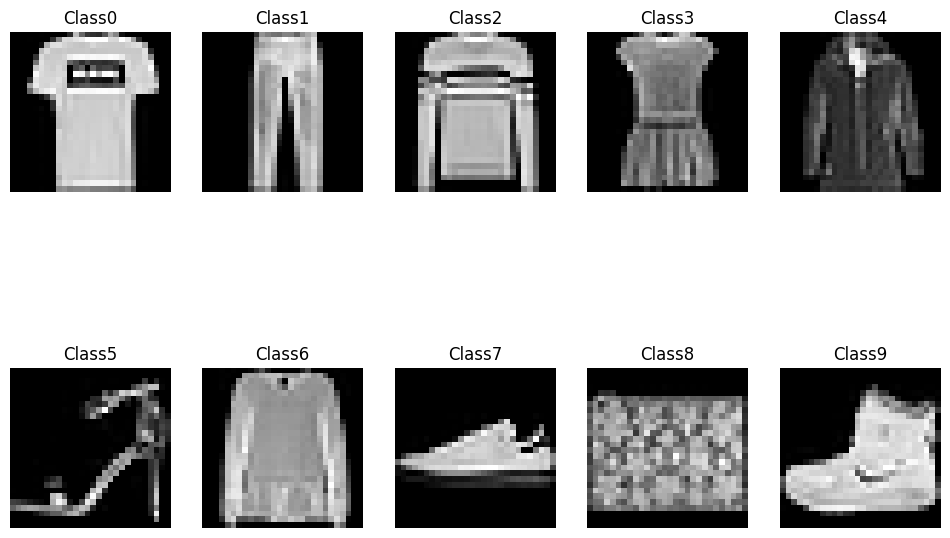

In [39]:
# number of unique classes in the dataset
unique_classes=np.unique(y_train)
num_classes=len(unique_classes)
print(f'The fashion mnist dataset has {num_classes} classes.')
print('The classes are : ',unique_classes)

# to see the number of classes with labels
plt.figure(figsize=(12,8))
for i ,cls in enumerate(unique_classes):
    idx=np.where(y_train == cls)[0][0]
    img = x_train[idx]

    ax= plt.subplot(2,5,i + 1)
    plt.imshow(img,cmap='gray')
    plt.title(f'Class{cls}')
    plt.axis('off')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [41]:
# Min Max Scaling
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train/=255
x_test/=255
classes=10

y_train = to_categorical(y_train,classes)
y_test = to_categorical(y_test,classes)

print("new x_train_shape : {} \n new y_train shape: {}".format(x_train.shape,y_train.shape))


new x_train_shape : (60000, 28, 28, 1) 
 new y_train shape: (60000, 10)


In [52]:

# Setting up hyperparameteres
hidden1 = 500
hidden2 = 200
hidden3 = 100
hidden4 = 50
hidden5 = 25
hidden6 = 20
hidden8 = 10
hidden9 = 5
classes = 10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

# Create sequential model
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))

# Add the  hidden layers
model.add(Dense(hidden1, activation='relu'))
Dropout(rate=0.3)
model.add(Dense(hidden2, activation='relu'))
Dropout(rate=0.3)
model.add(Dense(hidden3,activation='relu'))
Dropout(rate=0.3)
model.add(Dense(hidden4,activation='relu'))
model.add(Dense(hidden5,activation='relu'))
model.add(Dense(hidden6,activation='relu'))
model.add(Dense(hidden8,activation='relu'))
model.add(Dense(hidden9,activation='relu'))

# Add the output layer
model.add(Dense(classes, activation='softmax'))
Dropout(rate=0.3)



c:\Users\Umar Attique\miniconda3\envs\python_eda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Dropout name=dropout_3, built=False>

In [53]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 20)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,970 (1.98 MB)

 Trainable params: 519,970 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Compilation
model.compile(loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer='sgd',
            )

# Summary of the model


from time import time
# Record the current time to measure training time
tic = time()
history=model.fit(x_train,y_train,batch_size=42,epochs=15,verbose=1)
toc=time()
print("Model training took {} secs".format(toc-tic))

Epoch 1/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9117 - loss: 0.2360
Epoch 2/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9181 - loss: 0.2250
Epoch 3/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9193 - loss: 0.2179
Epoch 4/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9213 - loss: 0.2121
Epoch 5/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9258 - loss: 0.2010
Epoch 6/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9277 - loss: 0.1977
Epoch 7/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9286 - loss: 0.1954
Epoch 8/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9341 - loss: 0.1836
Epoch 9/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9368 - loss: 0.1752
Epoch 10/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9368 - loss: 0.1733
Epoch 11/15
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9383 - loss: 0.1661
Epoch 12/15
1429/1429 ━━━━

In [60]:
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

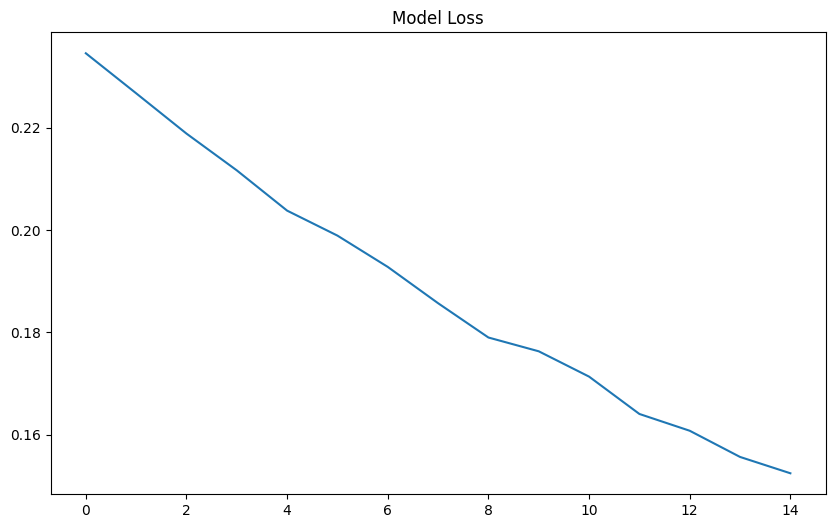

In [74]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.x_label("Epochs")
plt.y_label('Loss')


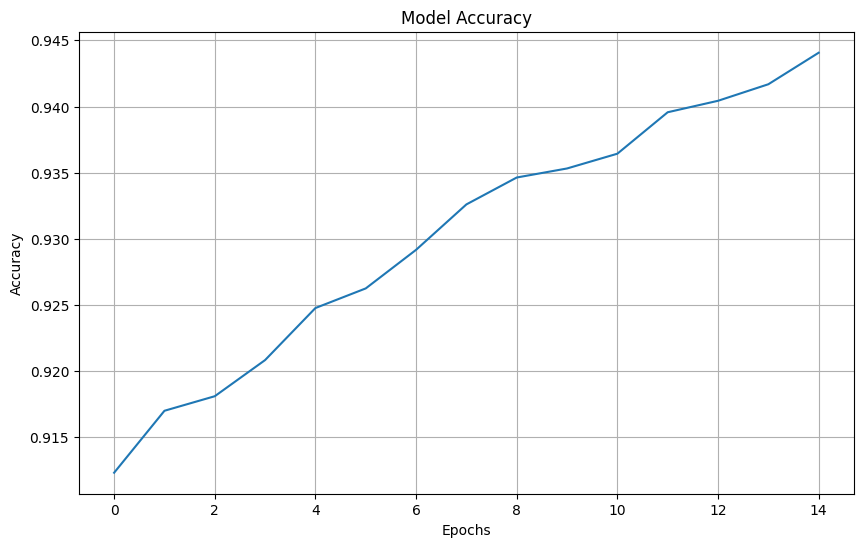

In [75]:
#Plotting the model
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.grid(True)


In [76]:
# Testing the model
from sklearn.metrics import accuracy_score
import numpy as np
y_pred_probs = model.predict(x_test,verbose=0)
y_pred = np.where(y_pred_probs > 0.5,1,0)
test_accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy : {}".format(test_accuracy))

Test accuracy : 0.8692


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


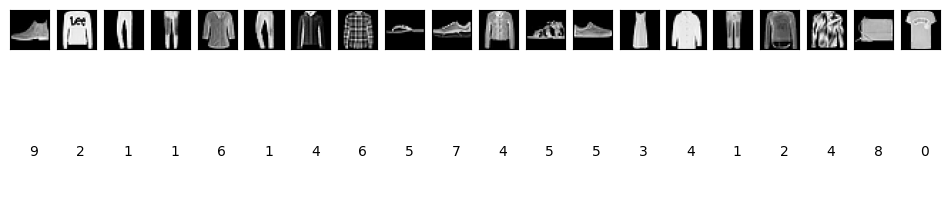

In [77]:
# Define a mask for selecting a range of indices(20 to 49)
mask = range(20,50)
# Select first 20 samples for visualization
x_valid=x_test[0:20]
actual_labels =  y_test[0:20]
# Predict the probabilities for selected validation samples
y_pred_probs_valid=model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5,1,0)
n = len(x_valid)
plt.figure(figsize=(12,3))
for i in range(n):
    # this line for to create the subplot for all images
    ax = plt.subplot(2,n,i+1)
    # this plot to see the images with good  plotting
    plt.imshow(x_valid[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display the predictd digit
    # set the suitable label below the image
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax=plt.subplot(2,n,i+1+n)
    # this line to set the label of each image below it exactly
    plt.text(0.5,0.5,str(predicted_digit))
    plt.axis('off')



# Save the model

In [78]:
model.save("models/fashio-recogbizer.h5")

# Early stopping

# RGB images

In [79]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

In [80]:
#Load the dataset
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [81]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)


The cifar10 dataset has 10 classes
The classes are :  [0 1 2 3 4 5 6 7 8 9]


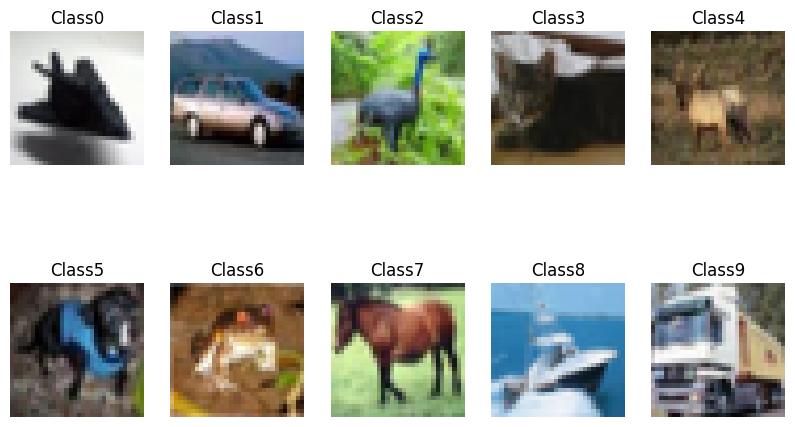

In [38]:
import matplotlib.pyplot as plt
unique_classes=np.unique(y_train)
num_classes=len(unique_classes)
print(f'The cifar10 dataset has {num_classes} classes')
print("The classes are : ",unique_classes)
# to see the images with number of classes and with their labels
plt.figure(figsize=(10,6))
for i ,cls in enumerate(unique_classes):
    idx=np.where(y_train == cls)[0][0] # for indexing the images
    img = x_train[idx] # to sww the images

    ax=plt.subplot(2,5,i+1)
    ax=plt.imshow(img,cmap='BrBG')
    plt.title(f'Class{cls}')
    plt.axis('off')

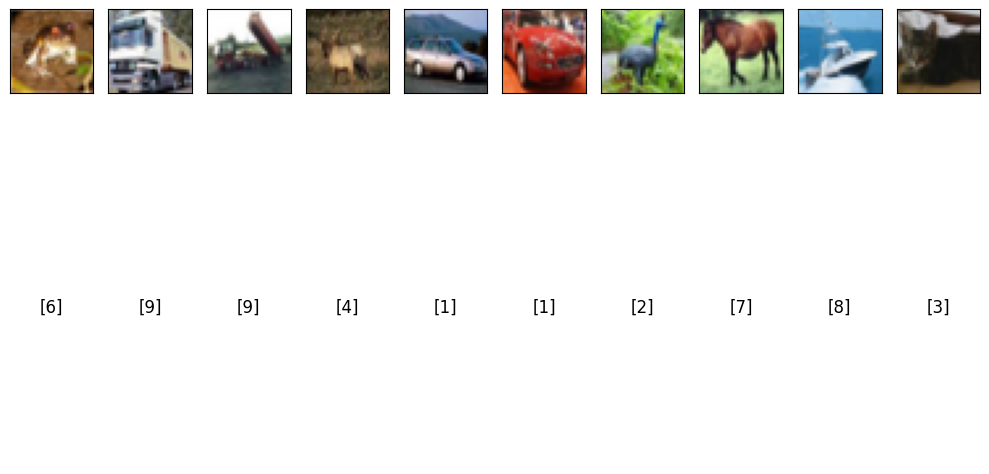

In [52]:
n = 10
plt.figure(figsize=(10,6))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_train[i].reshape(32,32,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Displaty the lables
    ax = plt.subplot(2,n,i+1+n)
    plt.axis('off')
    label = y_train[i]
    plt.text(0.5,0.5,str(label),fontsize=12,ha='center',va='center')

plt.tight_layout()
plt.show()
plt.close()

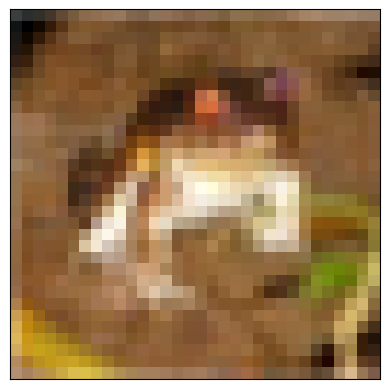

Pixel Values
[59 62 63] [43 46 45] [50 48 43] [68 54 42] [98 73 52] [119  91  63] [139 107  75] [145 110  80] [149 117  89] [149 120  93] [131 103  77] [125  99  76] [142 115  91] [144 112  86] [137 105  79] [129  97  71] [137 106  79] [134 106  76] [124  97  64] [139 113  78] [139 112  75] [133 105  69] [136 105  74] [139 108  77] [152 120  89] [163 131 100] [168 136 108] [159 129 102] [158 130 104] [158 132 108] [152 125 102] [148 124 103] 
[16 20 20] [0 0 0] [18  8  0] [51 27  8] [88 51 21] [120  82  43] [128  89  45] [127  86  44] [126  87  50] [116  79  44] [106  70  37] [101  67  35] [105  70  36] [113  74  35] [109  70  33] [112  72  37] [119  79  44] [109  71  33] [105  69  27] [125  89  46] [127  92  46] [122  85  39] [131  89  47] [124  82  41] [121  79  37] [131  89  48] [132  91  53] [133  94  58] [133  96  60] [123  88  55] [119  83  50] [122  87  57] 
[25 24 21] [16  7  0] [49 27  8] [83 50 23] [110  72  41] [129  92  54] [130  93  55] [121  82  47] [113  77  43] [112  78

In [57]:

import matplotlib.pyplot as plt

# Assuming x_train is your dataset and x_train[0] is your image data
# Reshape the image data from (3072,) to (32, 32, 3) for an RGB image
image = x_train[0].reshape((32, 32, 3))

# Display the reshaped image
plt.imshow(image, cmap='BrBG')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

print("Pixel Values")
# Print the pixel values
for row in image:
    for pixel in row:
        print(pixel, end=' ')
    print()


In [82]:
x_train,x_test = x_train/255.0,x_test/255.0
x_train,x_test = x_train.reshape(50000,32,32,3),x_test.reshape(10000,32,32,3)

print("New x_train shape : {} \n New y_train shape : {}".format(x_train.shape,y_train.shape))


New x_train shape : (50000, 32, 32, 3) 
 New y_train shape : (50000, 1)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

model = Sequential()

model.add(Conv2D(16,(4,4),padding='same',strides=1,activation='relu',input_shape=(32,32,3)))
BatchNormalization()
model.add(MaxPooling2D(3,3))

model.add(Conv2D(32,(4,4),padding='same',strides=1,activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(3,3))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
Dropout(rate=0.5)
model.add(Dense(10,activation='softmax'))
Dropout(rate=0.5)
# Compile the model


c:\Users\Umar Attique\miniconda3\envs\python_eda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,154 (109.98 KB)

 Trainable params: 28,154 (109.98 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
from time import time
tic = time()
hsitory=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1)
toc = time()
print("Model training took {} secs".format(toc-tic))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.6822 - loss: 0.9100
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6929 - loss: 0.8859
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7010 - loss: 0.8626
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7037 - loss: 0.8491
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7144 - loss: 0.8214
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7172 - loss: 0.8224
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7236 - loss: 0.7966
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7262 - loss: 0.7869
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7326 - loss: 0.7743
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7338 - loss: 0.7703
Model training took 94.30389070510864 secs


In [92]:
#Plotting the model
plt.figure(figsize=(10,6))
plt.plot(history.history['metrics'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.grid(True)

KeyError: 'metrics'

<Figure size 1000x600 with 0 Axes>

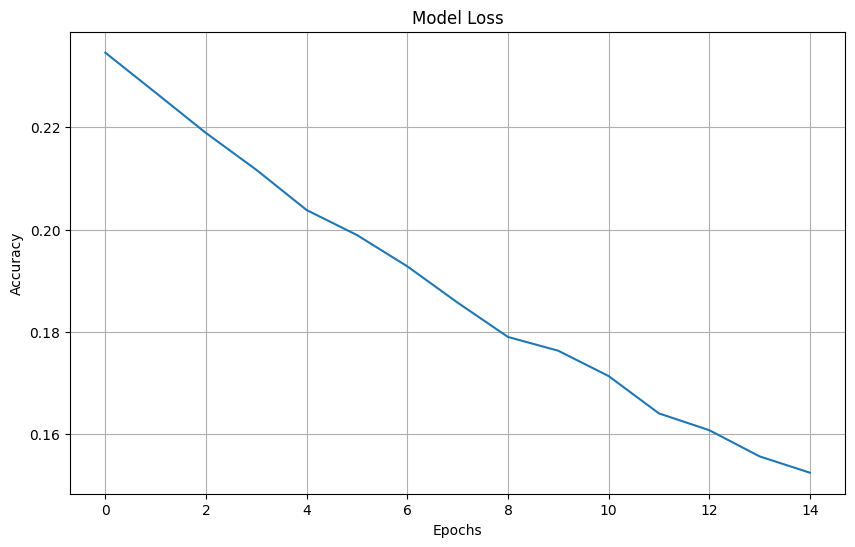

In [93]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.grid(True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


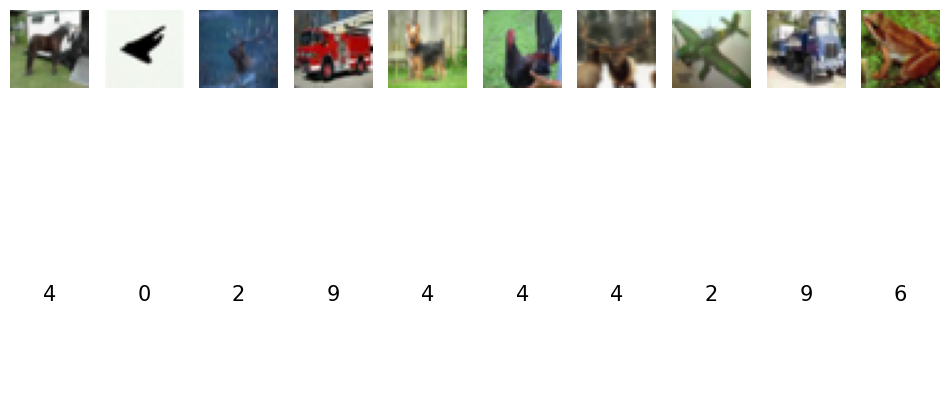

In [94]:
import numpy as np
import matplotlib.pyplot as plt

x_valid = x_test[20:30]
y_valid = y_test[20:30]
# predicted probabbilites for selected validation samples
y_pred_probs_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5,1,0)
# Number of validation samples
n = len(x_valid)
plt.figure(figsize=(12,6))
for i in range(n):
    plt.subplot(2,n,i +1)
    plt.imshow(x_valid[i].reshape(32,32,3))
    plt.gray()
    plt.axis('off')
    
    label = np.argmax(y_pred_probs_valid[i])
    plt.subplot(2,n,i+1+n)
    plt.text(0.5,0.5,str(label),fontsize=15,ha='center')
    plt.axis('off')

    



## By using mobile net

In [95]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers,models
mnist = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [96]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [97]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [98]:
# By using mobile net
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
from keras.layers import *
from keras.layers import Flatten
# Load without classifier layer
model = MobileNetV2(include_top=False,input_shape=(32,32,3))
# Add new classifier layer
flatn = Flatten()(model.layers[-1].output)
dense1 = Dense(128,activation='relu')(flatn)
dense2 =Dense(64,activation='relu')(dense1)
output =Dense(10,activation='softmax')(dense2)

# Define the model
model = Model(inputs=model.inputs,outputs=output)

#model.summary()


C:\Users\Umar Attique\AppData\Local\Temp\ipykernel_17264\1001849502.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(include_top=False,input_shape=(32,32,3))


In [99]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [100]:
model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 421s 464ms/step - accuracy: 0.4975 - loss: 1.4604
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 343s 414ms/step - accuracy: 0.7147 - loss: 0.8438
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 307s 393ms/step - accuracy: 0.7726 - loss: 0.6796
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 256s 327ms/step - accuracy: 0.8015 - loss: 0.5944
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 286ms/step - accuracy: 0.8107 - loss: 0.5713
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 217s 278ms/step - accuracy: 0.8314 - loss: 0.5125
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 284ms/step - accuracy: 0.8401 - loss: 0.4817
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 226s 289ms/step - accuracy: 0.8486 - loss: 0.4532
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 223s 285ms/step - accuracy: 0.8655 - loss: 0.4031
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 226s 288ms/step - accuracy: 0.8744 - loss: 0.3814


In [ ]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
# ...